In [1]:
using Pkg
Pkg.activate("../")

using Revise
using ProbabilisticFSMs

 Activating environment at `~/GithubRepositories/ProbabilisticFSMs/Project.toml`
┌ Info: Precompiling ProbabilisticFSMs [c2ae6250-d0a1-11ea-0991-234599ce5244]
└ @ Base loading.jl:1260


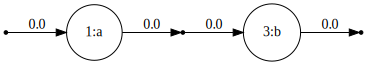

In [65]:
emissions_names = Dict{StateID, AbstractString}(
    1 => "a",
    2 => "b",
    3 => "c",
    4 => "d"
)

fsm = FSM(emissions_names)
s1 = addstate!(fsm, State(1, pdfindex = 1))
s2 = addstate!(fsm, State(2))
s3 = addstate!(fsm, State(3, pdfindex = 2))

link!(fsm, initstate(fsm), s1)
link!(fsm, s1, s2)
link!(fsm, s2, s3)
link!(fsm, s3, finalstate(fsm))

fsm

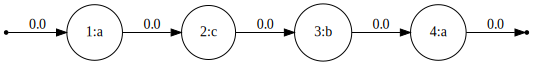

In [66]:
fsm1 = LinearFSM(["a", "c", "b", "a"], emissions_names)

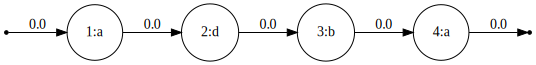

In [67]:
fsm2 = LinearFSM(["a", "d", "b", "a"], emissions_names)

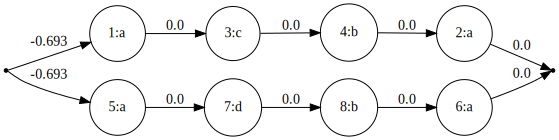

In [79]:
fsm = union(fsm1, fsm2)

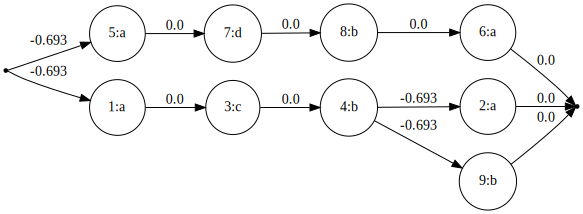

In [86]:
test = deepcopy(fsm)
s = addstate!(test, State(9, 2))
link!(test, test.states[4], s)
link!(test, s, finalstate(test))
test = test |> weightnormalize

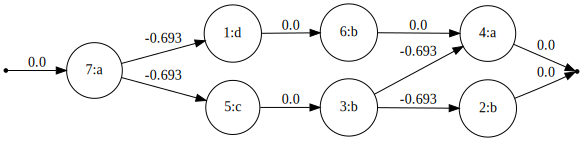

In [87]:
minimize(test)

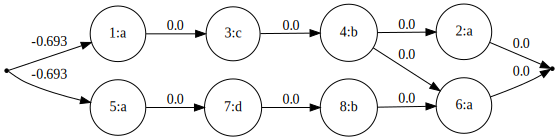

In [69]:
fsm
link!(fsm, fsm.states[4], fsm.states[6], 0.0)
fsm

In [70]:
addstate!(fsm, State(100, 1))

State(100, pdfindex = 1)

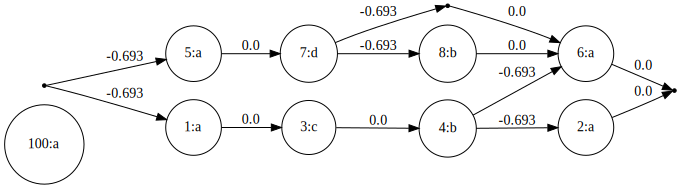

In [71]:
addstate!(fsm, State(101))
link!(fsm, fsm.states[101], fsm.states[6])
link!(fsm, fsm.states[7], fsm.states[101])
fsm = fsm |> weightnormalize

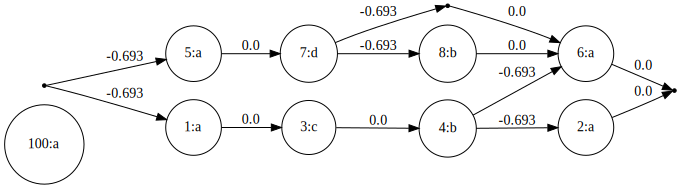

In [72]:
fsm

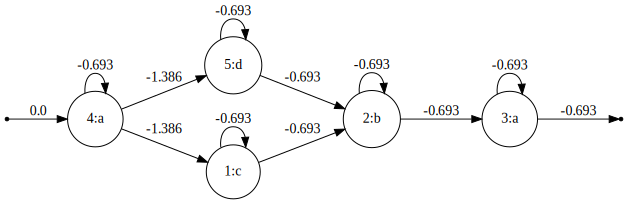

In [95]:
fsm = fsm |> minimize |> addselfloop

In [96]:
D,N = 4, 10 # number of distributions times number of frames
v = randn(N, 1) .- 6 
llh = repeat(v', D)

4×10 Array{Float64,2}:
 -5.56505  -6.71922  -5.41856  -6.64504  …  -6.63464  -6.15491  -6.95854
 -5.56505  -6.71922  -5.41856  -6.64504     -6.63464  -6.15491  -6.95854
 -5.56505  -6.71922  -5.41856  -6.64504     -6.63464  -6.15491  -6.95854
 -5.56505  -6.71922  -5.41856  -6.64504     -6.63464  -6.15491  -6.95854

In [97]:
llh = zeros(4,5)

4×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [98]:
llh[:,1:2] .= [1, 0.5, 0, 0]
llh[:,3:4] .= [0.5, 1, 0.5, 0]
llh[:,5:5] .= [0, 0.5, 1, 0.5]
llh

4×5 Array{Float64,2}:
 1.0  1.0  0.5  0.5  0.0
 0.5  0.5  1.0  1.0  0.5
 0.0  0.0  0.5  0.5  1.0
 0.0  0.0  0.0  0.0  0.5

In [100]:
emissions_names

Dict{Union{ProbabilisticFSMs.FinalStateID, ProbabilisticFSMs.InitStateID, Int64},AbstractString} with 4 entries:
  4 => "d"
  2 => "b"
  3 => "c"
  1 => "a"

In [125]:
α = αrecursion(fsm, llh; pruning = nopruning) # the lower the more pruning 
α

[n = 1]  	4	4 = 1.000  
[n = 2]  	4	1 = -0.386  	4 = 1.307  	5 = -0.386  
[n = 3]  	2	1 = 0.895  	2 = 1.234  	4 = 1.114  	5 = 0.234  
[n = 4]  	2	1 = 1.522  	2 = 3.357  	3 = 1.041  	4 = 0.921  	5 = 0.332  
[n = 5]  	2	1 = 2.925  	2 = 3.827  	3 = 2.758  	4 = 0.227  	5 = 1.074  


In [130]:
β = βrecursion(fsm, llh; pruning=nopruning) # the lower the more pruning 
β

[n = 1]  	1	1 = 0.926  	2 = 0.676  	3 = -0.773  	4 = 0.456  	5 = 0.882  
[n = 2]  	1	1 = 0.715  	2 = 0.601  	3 = -1.079  	4 = -0.799  	5 = 0.601  
[n = 3]  	2	1 = -0.386  	2 = 0.088  	3 = -0.886  	5 = -0.386  
[n = 4]  	3	2 = -0.693  	3 = -0.693  
[n = 5]  	3	3 = 0.000  


In [133]:
lnαβ, tll = αβrecursion(fsm, llh) # the lower the more pruning 
prinln(ln

[n = 1]  	4	4 = 0.000  
[n = 2]  	4	1 = -1.128  	4 = -0.948  	5 = -1.242  
[n = 3]  	2	1 = -1.328  	2 = -0.514  	5 = -1.988  
[n = 4]  	2	2 = -0.094  	3 = -2.410  
[n = 5]  	3	3 = 0.000  


State[State(id = 5, pdfindex = 1, a)]
[2.4496921953675406]
-----
State[State(id = 5, pdfindex = 1, a), State(id = 7, pdfindex = 2, b)]
[0.6804271107052051, 2.2143455711413766]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 2, pdfindex = 3, c), State(id = 7, pdfindex = 2, b)]
[1.065389135159319, -2.4302709607893522, -1.709925938893071]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 8, pdfindex = 1, a)]
[1.1020871927699054, -4.924617799721492]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 8, pdfindex = 1, a)]
[0.08948705438494042, -4.1541803992854796]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 8, pdfindex = 1, a)]
[-2.103903668577119, -0.5717629519612493]
-----
State[State(id = 8, pdfindex = 1, a)]
[-0.5717629519612493]
-----


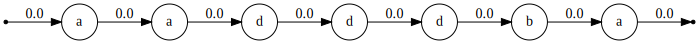

In [18]:
path = viterbi(g, llh)